In [1]:
# black friday project EDA

In [2]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# read dataset ==> Kaggle divides the dataset already into Train and Test data
df = pd.read_csv("BlackFriday.csv")
df.head()

# in product category there is some NAN values

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
df.info()
# we can see that There are 12 columns with different formats of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
# to check wich columns have NAN value
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [8]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [9]:
# we can see that Product_Category_2, and Product_Category_3 have significant NAN values

In [10]:
# another way to count NAN :)
count_nan = len(df) - df.count()
count_nan

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [11]:
# Now I will  check Product_Category_2, and Product_Category_3 colums unique values and then impute a default value for NaNs
print('Product_Category_2 unique values', df['Product_Category_2'].unique())
print('Product_Category_3 unique values', df['Product_Category_3'].unique())

Product_Category_2 unique values [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 unique values [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [12]:
# impute 0 for all NAN values 
df.fillna(value=0,inplace=True)

In [13]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


In [14]:
df.shape

(537577, 12)

In [15]:
# Check for duplicates in User_ID
idunique = len(set(df.User_ID))
idtotal = df.shape[0]
iddupli = idtotal - idunique
print("There are " + str(iddupli) + " Duplicate  User_ID out of  " + str(idtotal))

There are 531686 Duplicate  User_ID out of  537577


In [16]:
# Now let see features Distribution ==> first let see Numeric features


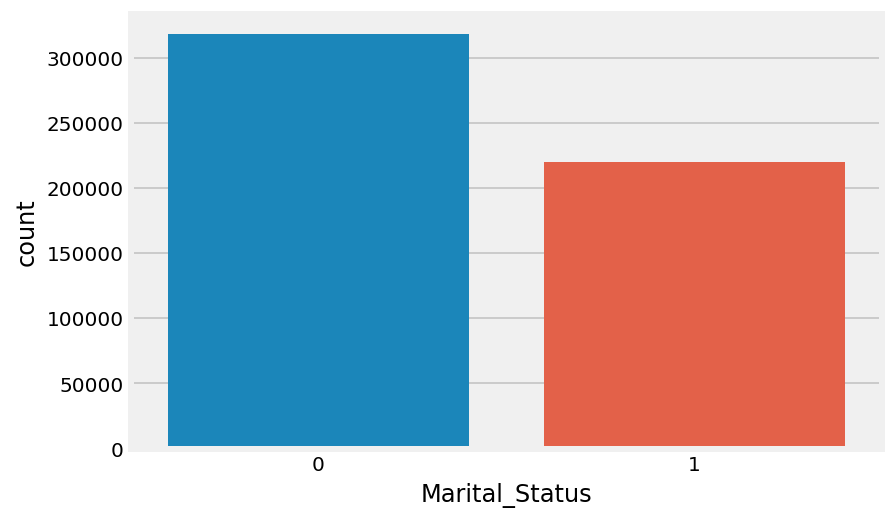

In [17]:
# Marital variable distribution
sns.countplot(df['Marital_Status'])

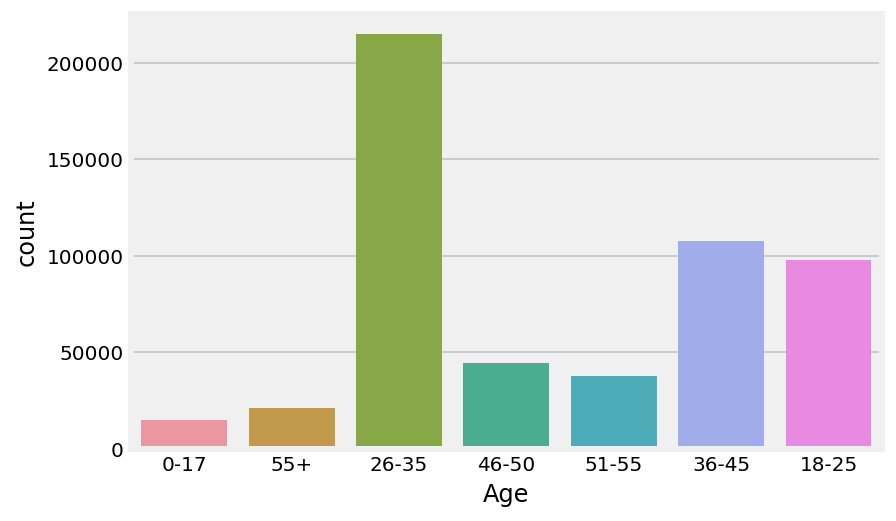

In [18]:
# Age variable distribution
sns.countplot(df['Age'])

In [19]:
# Most of customers in 26-35 years old 
df.Age.value_counts()  

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

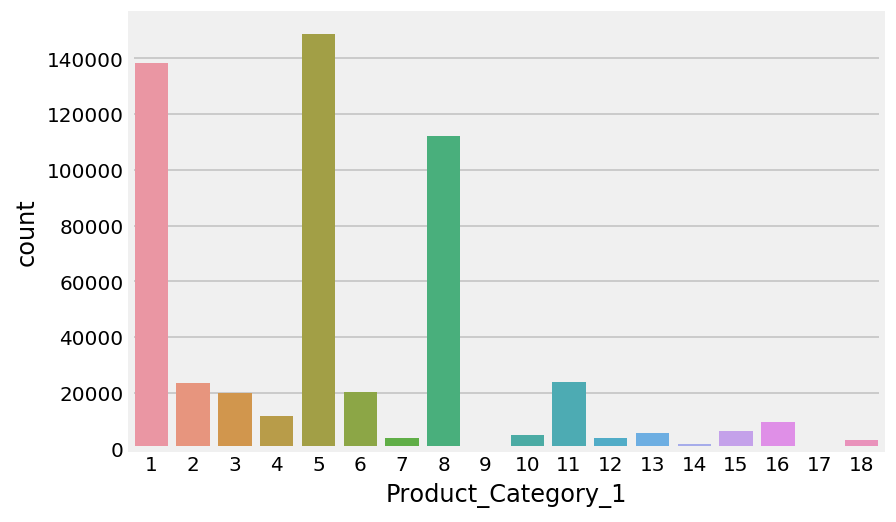

In [20]:
# Product_Category_1 variable distribution 
sns.countplot(df['Product_Category_1'])

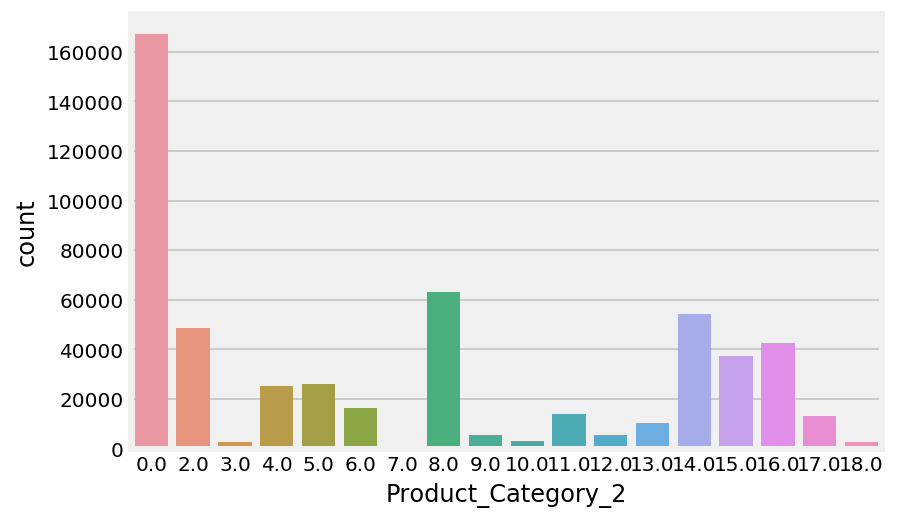

In [21]:
# Product_Category_2 variable distribution 
sns.countplot(df['Product_Category_2'])

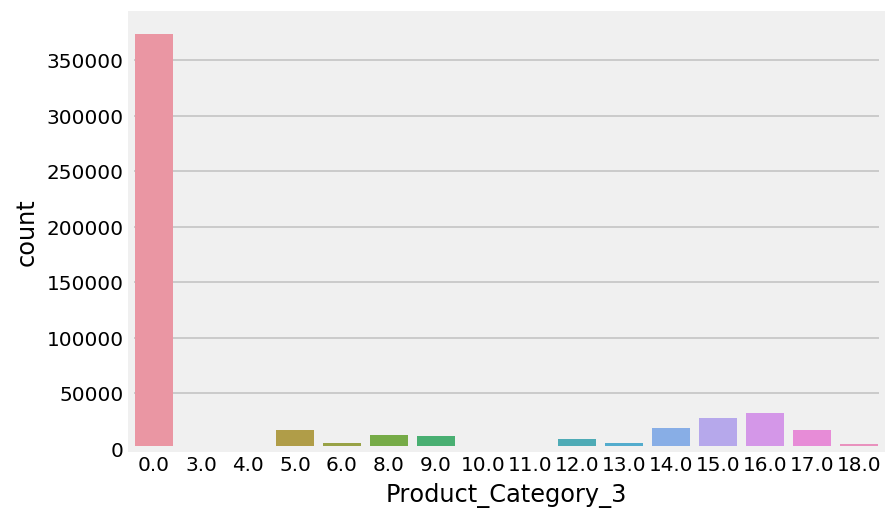

In [22]:
# Product_Category_3 variable distribution 
sns.countplot(df['Product_Category_3'])

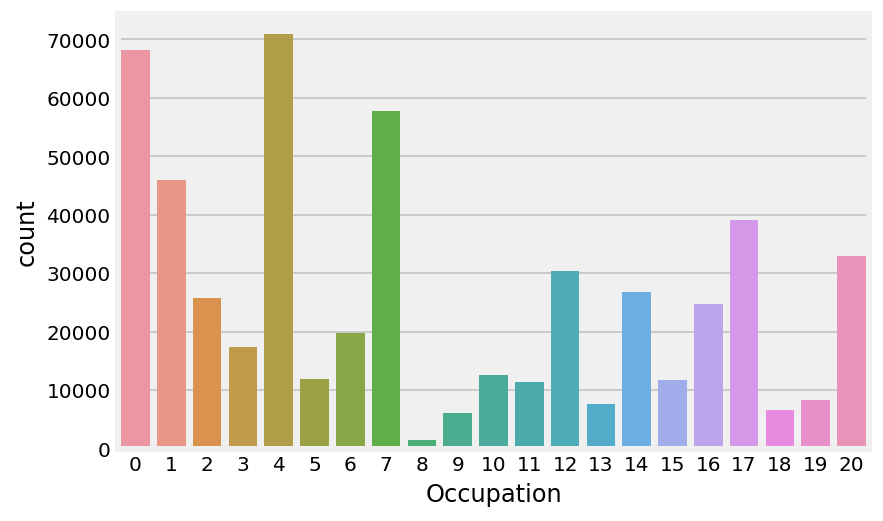

In [23]:
# Occupation variable distribution 
sns.countplot(df['Occupation'])
# majorty of customers are have occupation from 0-7 

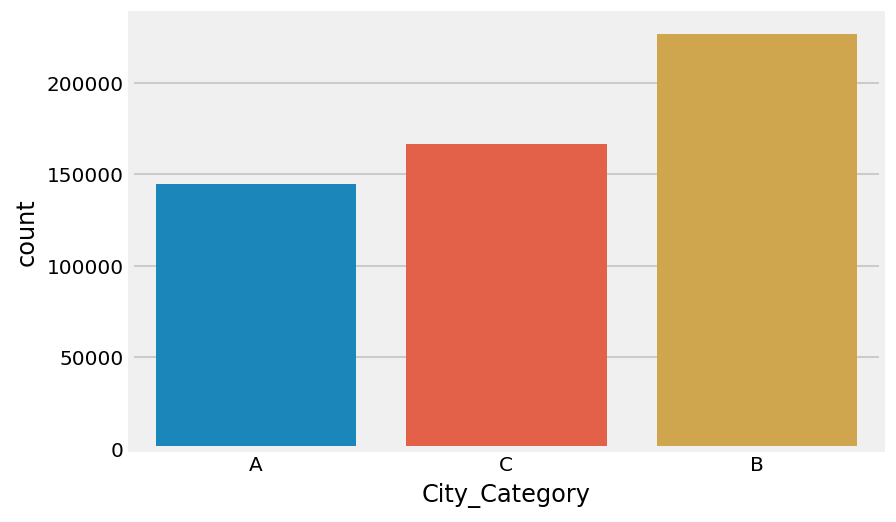

In [24]:
# City_category variable distribution 
sns.countplot(df['City_Category'])
# largest number of customers are live in city B

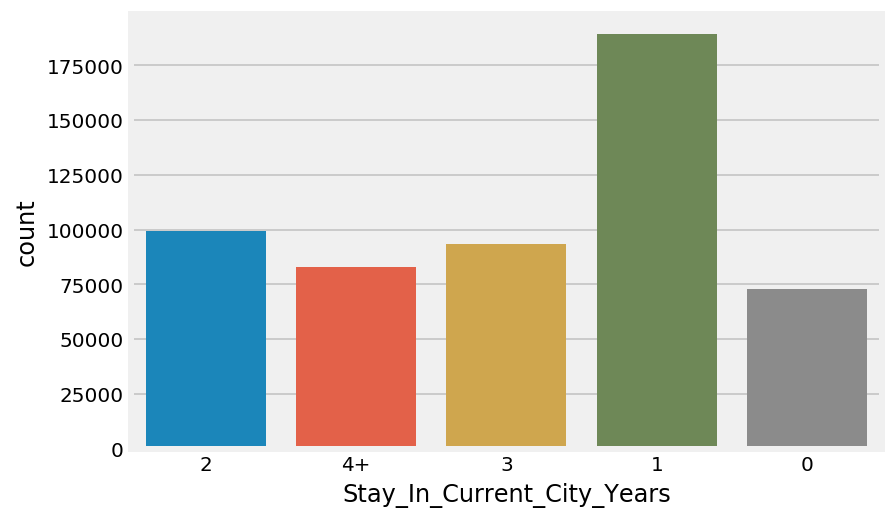

In [25]:
# Stay_In_Current_City_Years variable distribution 
sns.countplot(df['Stay_In_Current_City_Years'])
# people in first year make purchase more than other years.

C:\Users\johar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Purchase Distribution')

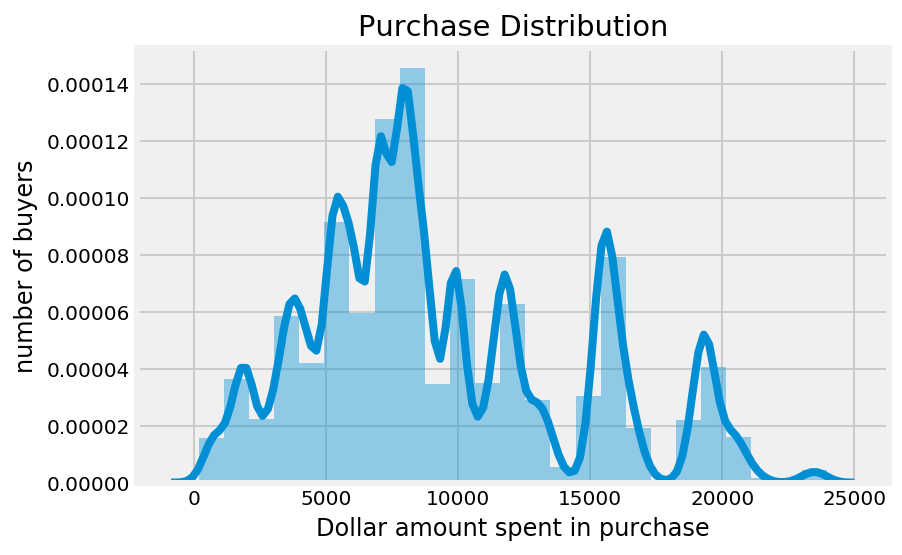

In [26]:
# target variable ==> purchase distribution
sns.distplot(df.Purchase, bins = 25)
plt.xlabel("Dollar amount spent in purchase")
plt.ylabel("number of buyers")
plt.title("Purchase Distribution")

In [27]:
# Now let see Coorelation between  numeric features and target variable


In [28]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes


User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

In [29]:
corr = numeric_features.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10])
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Product_Category_3    0.284120
Product_Category_2    0.038395
Occupation            0.021104
User_ID               0.005389
Marital_Status        0.000129
Product_Category_1   -0.314125
Name: Purchase, dtype: float64
Purchase              1.000000
Product_Category_3    0.284120
Product_Category_2    0.038395
Occupation            0.021104
User_ID               0.005389
Marital_Status        0.000129
Product_Category_1   -0.314125
Name: Purchase, dtype: float64


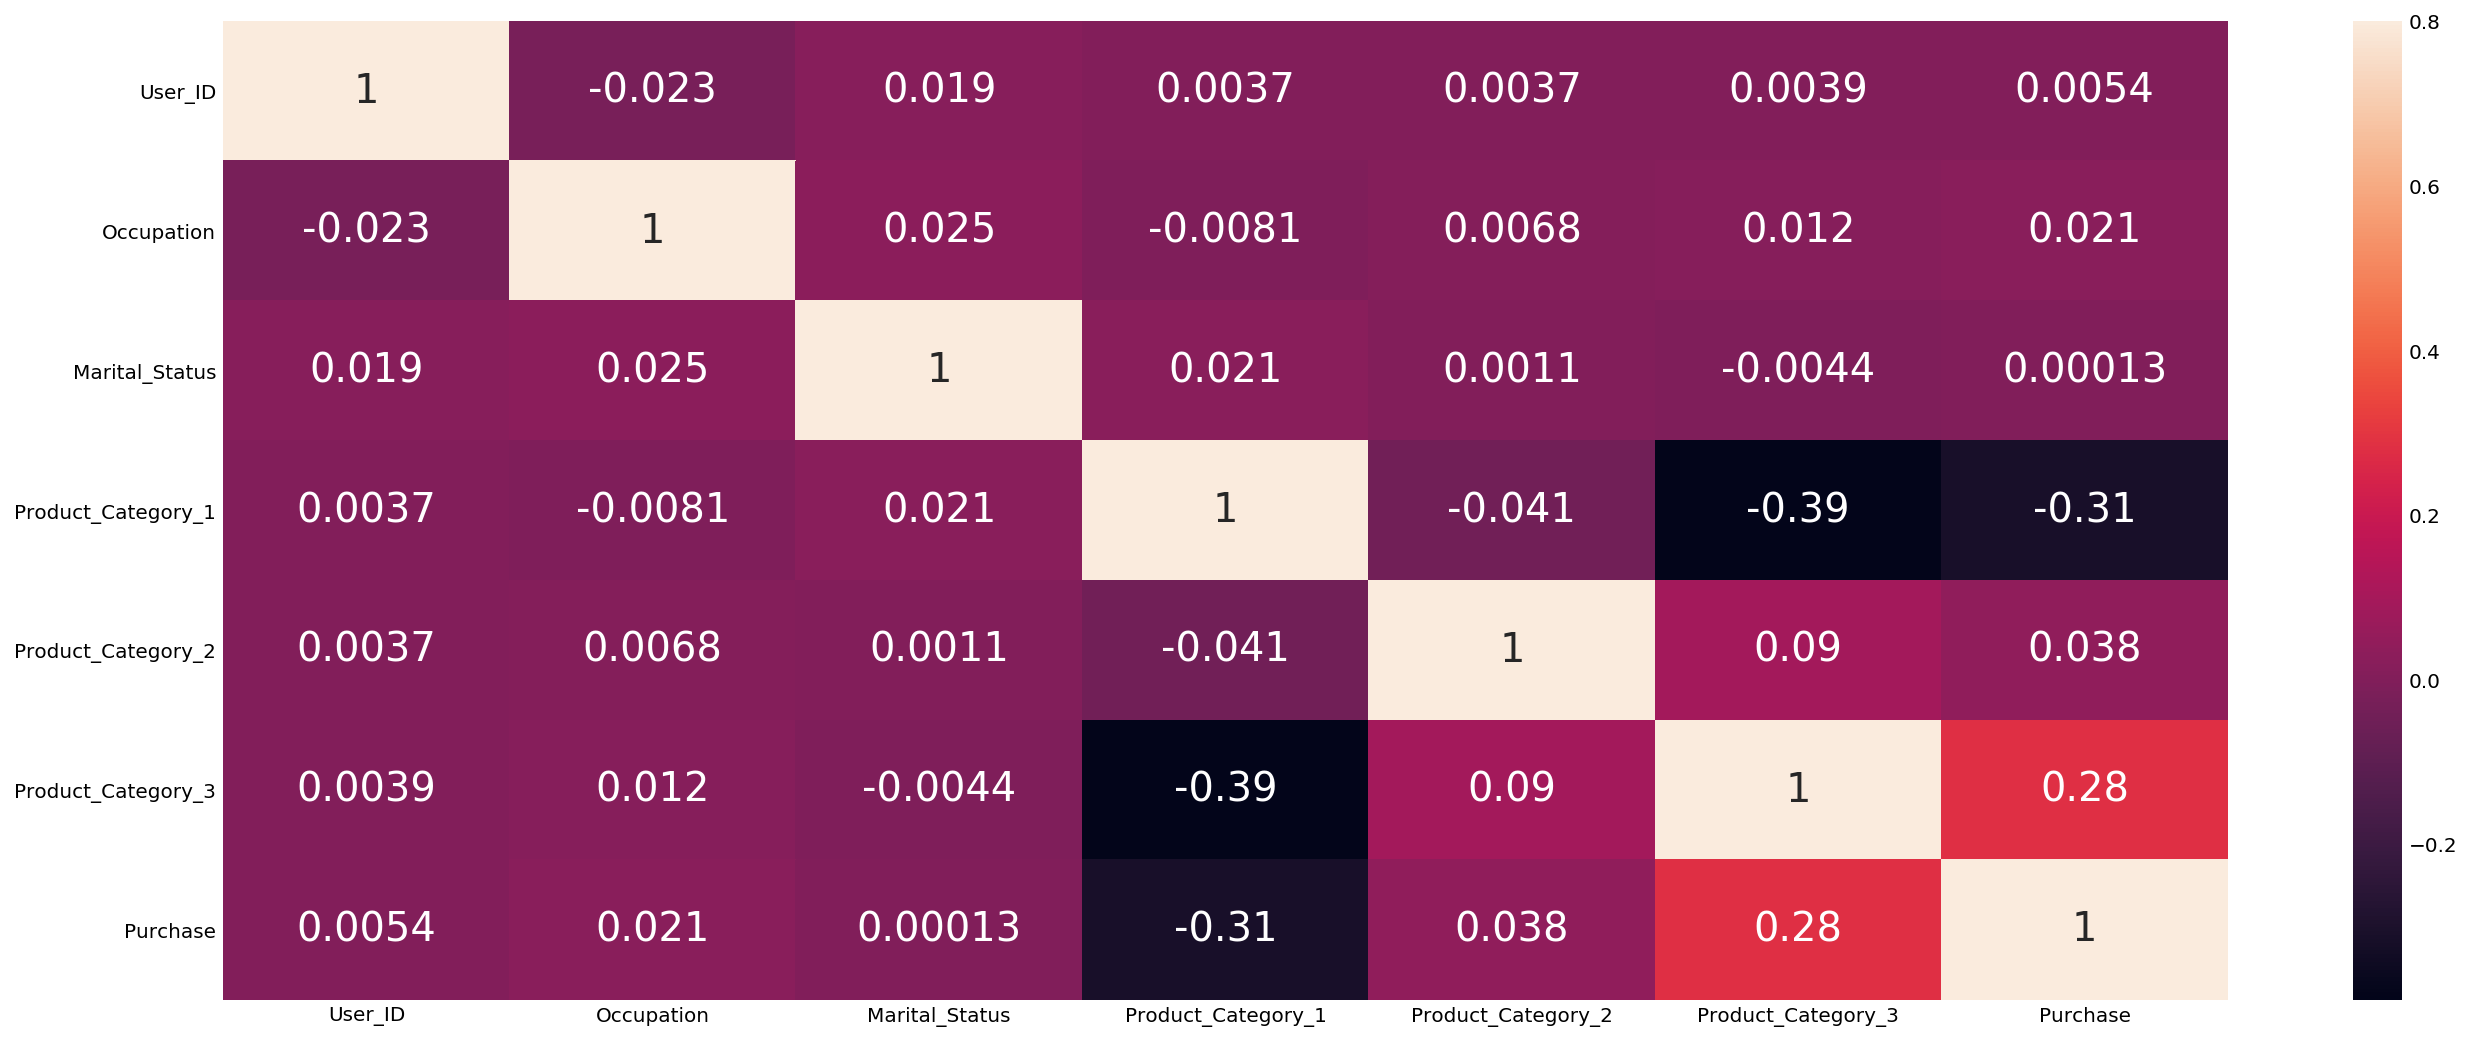

In [30]:
# create correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);

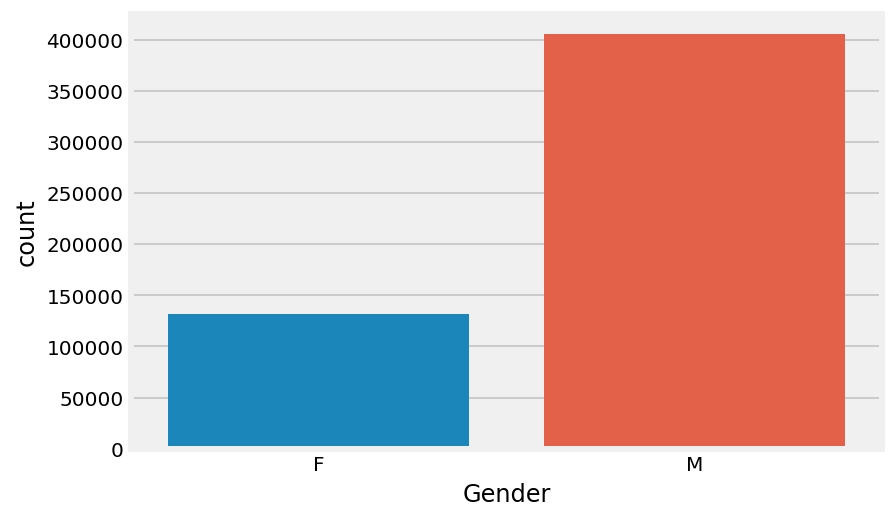

In [31]:
# Now let see Categorical features distribution 
# Gender variable distribution
sns.countplot(df['Gender'])


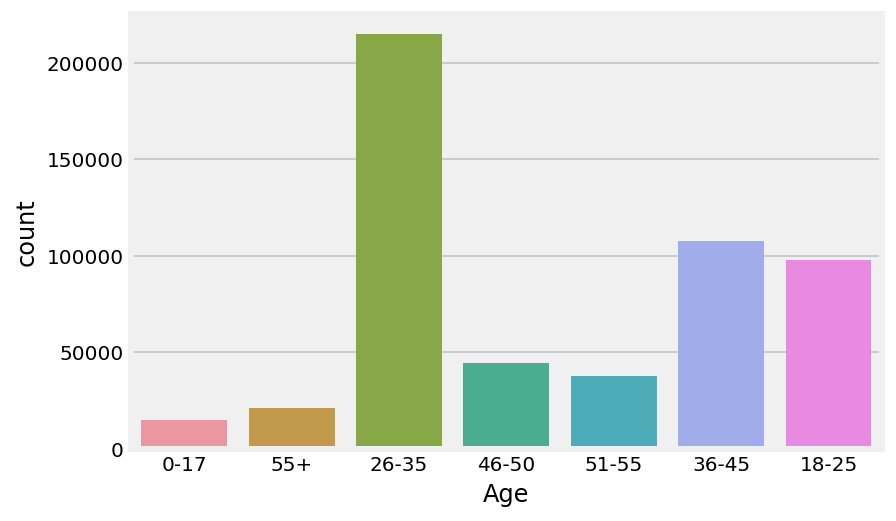

In [32]:
# Age variable distribution
sns.countplot(df['Age'])

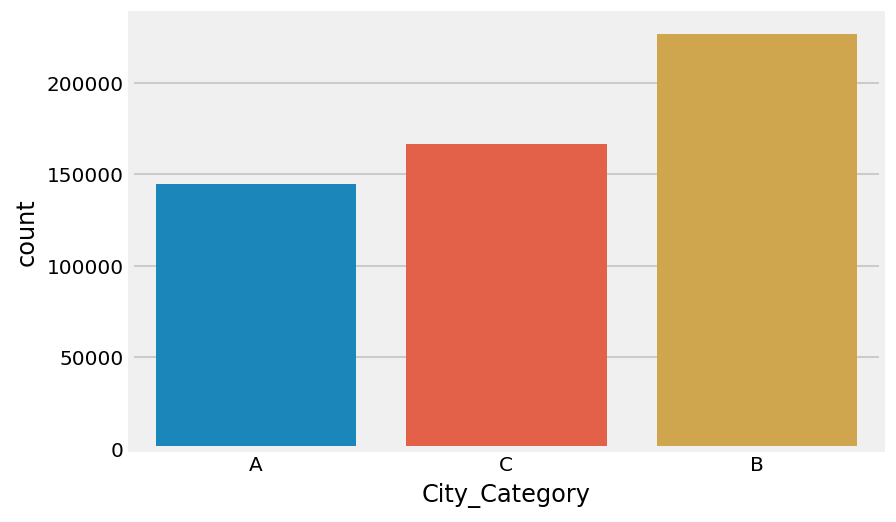

In [33]:
# city_category variable distribution
sns.countplot(df['City_Category'])

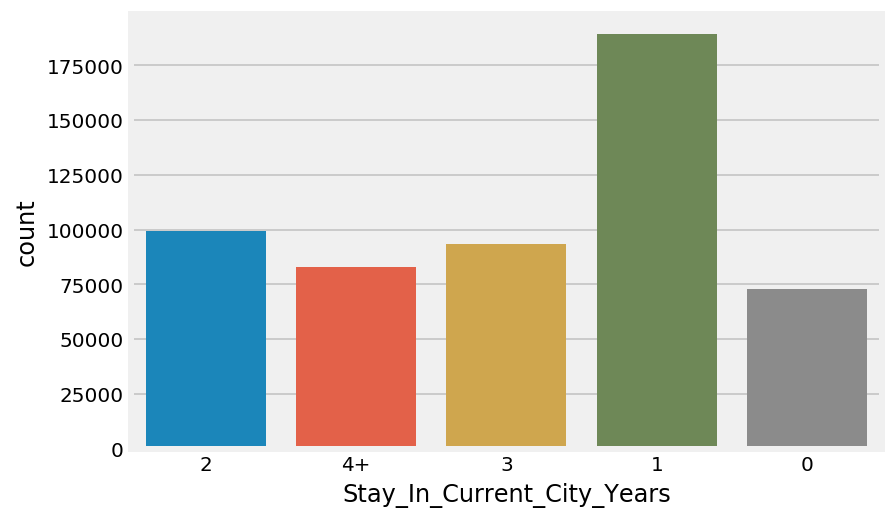

In [34]:
# stay_in_currentcity_years variable distribution
sns.countplot(df['Stay_In_Current_City_Years'])

In [35]:
# two features relationship analysis
#occupation with purchase analysis  since it has high corr value  2.1%

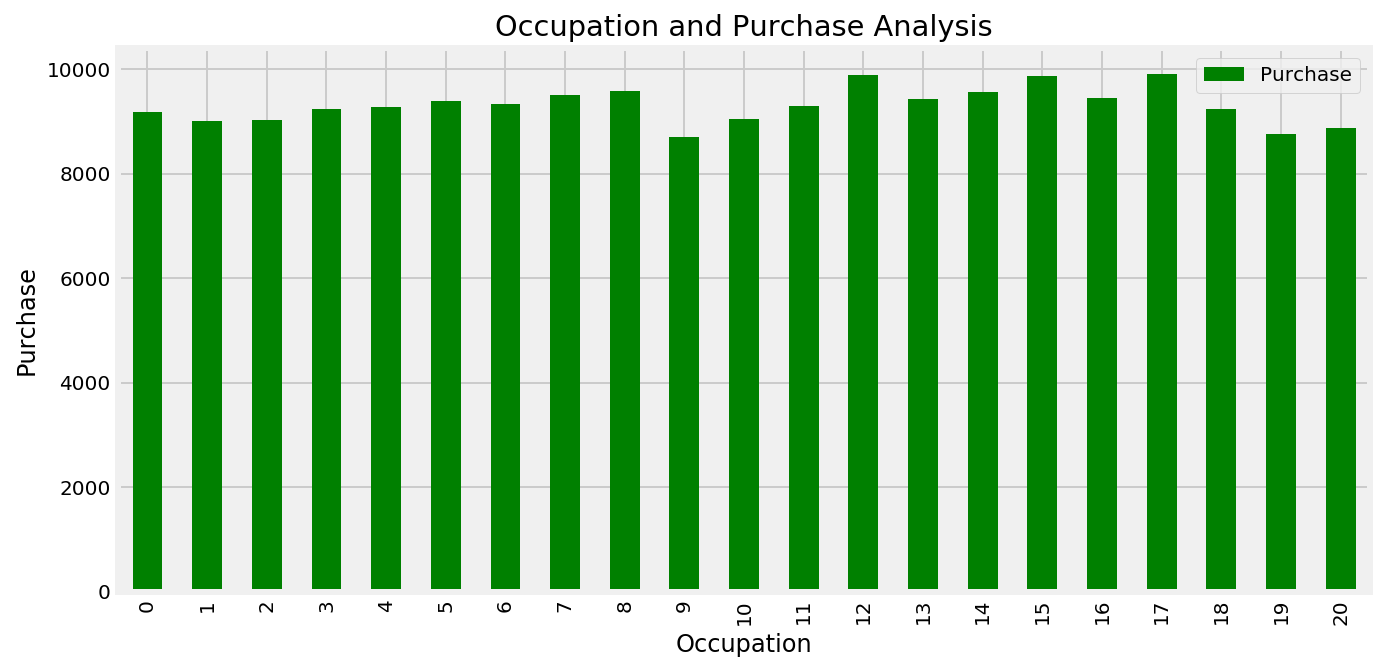

In [36]:
occupation_v = df.pivot_table(index="Occupation", values="Purchase", aggfunc=np.mean)
occupation_v.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.show()
# on average customer with occupation 12 and 17 are the ones who spent the most

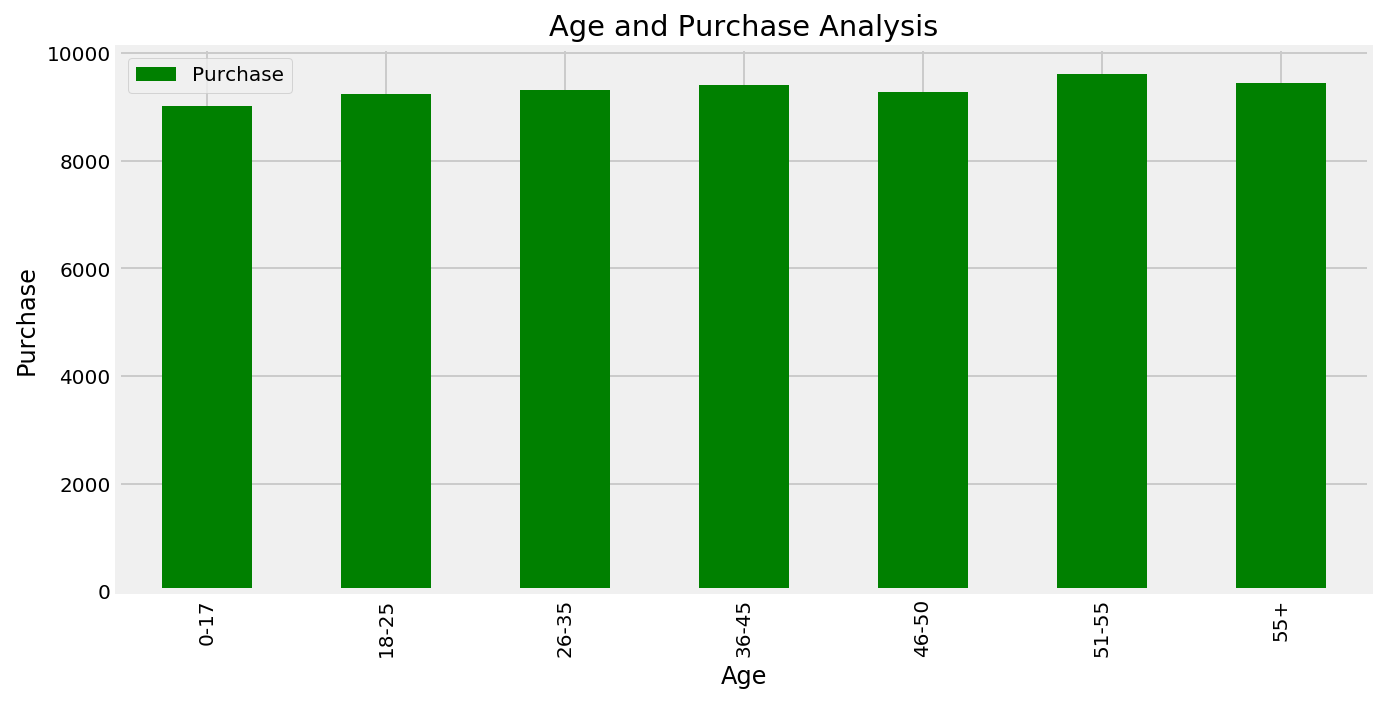

In [37]:
# Age with purchase analysis
Age_v= df.pivot_table(index="Age", values="Purchase", aggfunc=np.mean)
Age_v.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.show()
# on average customer with 51-55 years old are the ones who spent the most

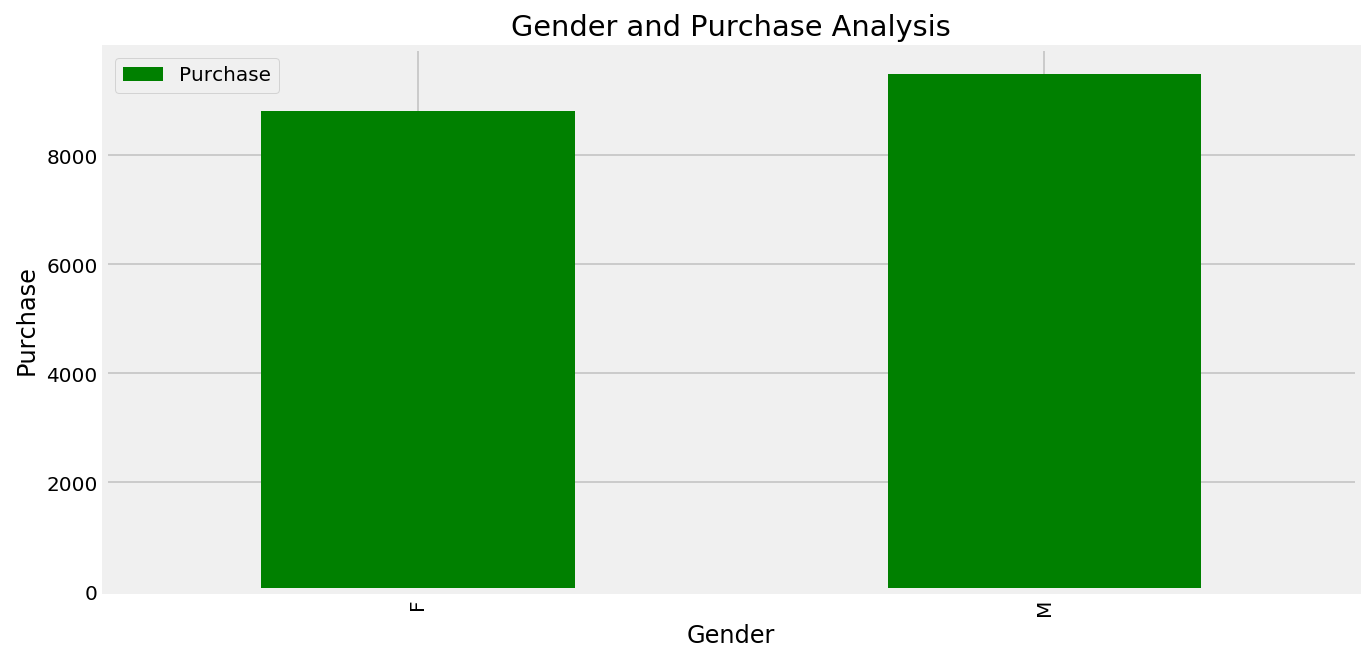

In [38]:
# Gender with Purchase analysis
Gen_v= df.pivot_table(index="Gender", values="Purchase", aggfunc=np.mean)
Gen_v.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.show()
# on average males spent more than females 

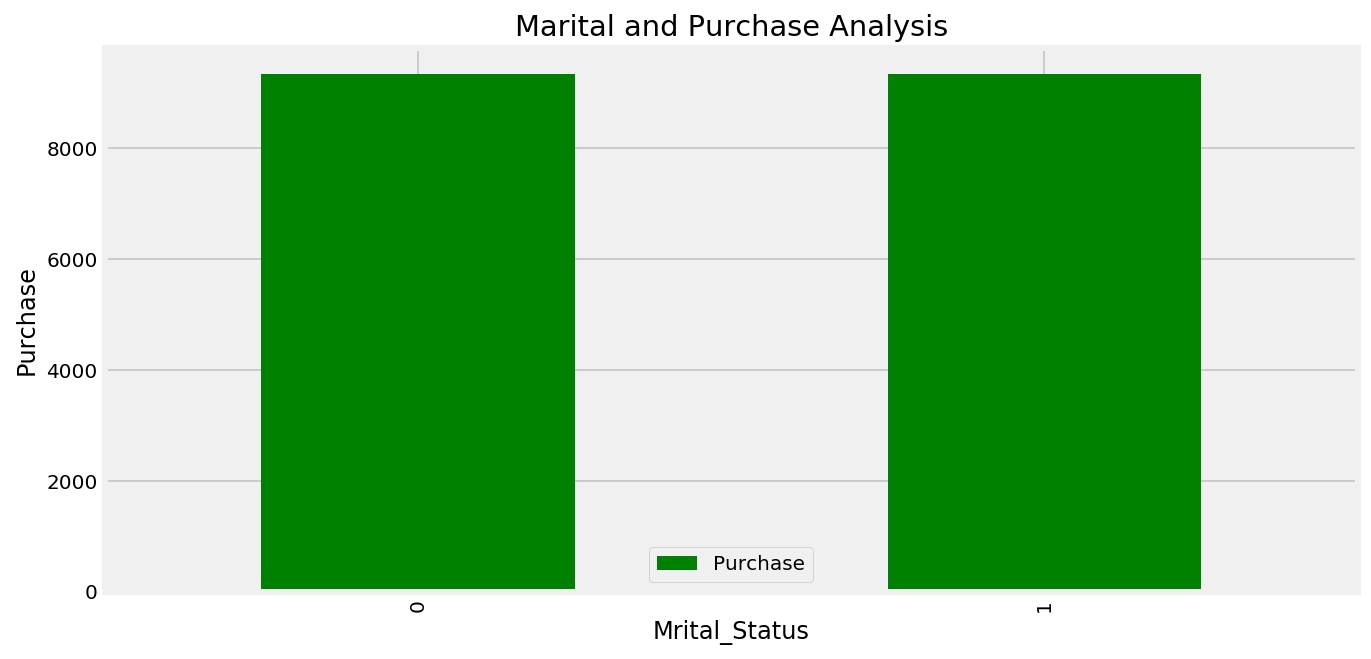

In [39]:
# Marital_status with Purchase analysis
m_v= df.pivot_table(index="Marital_Status", values="Purchase", aggfunc=np.mean)
m_v.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Mrital_Status")
plt.ylabel("Purchase")
plt.title("Marital and Purchase Analysis")
plt.show()
# on average Single and Mrried spent the same 

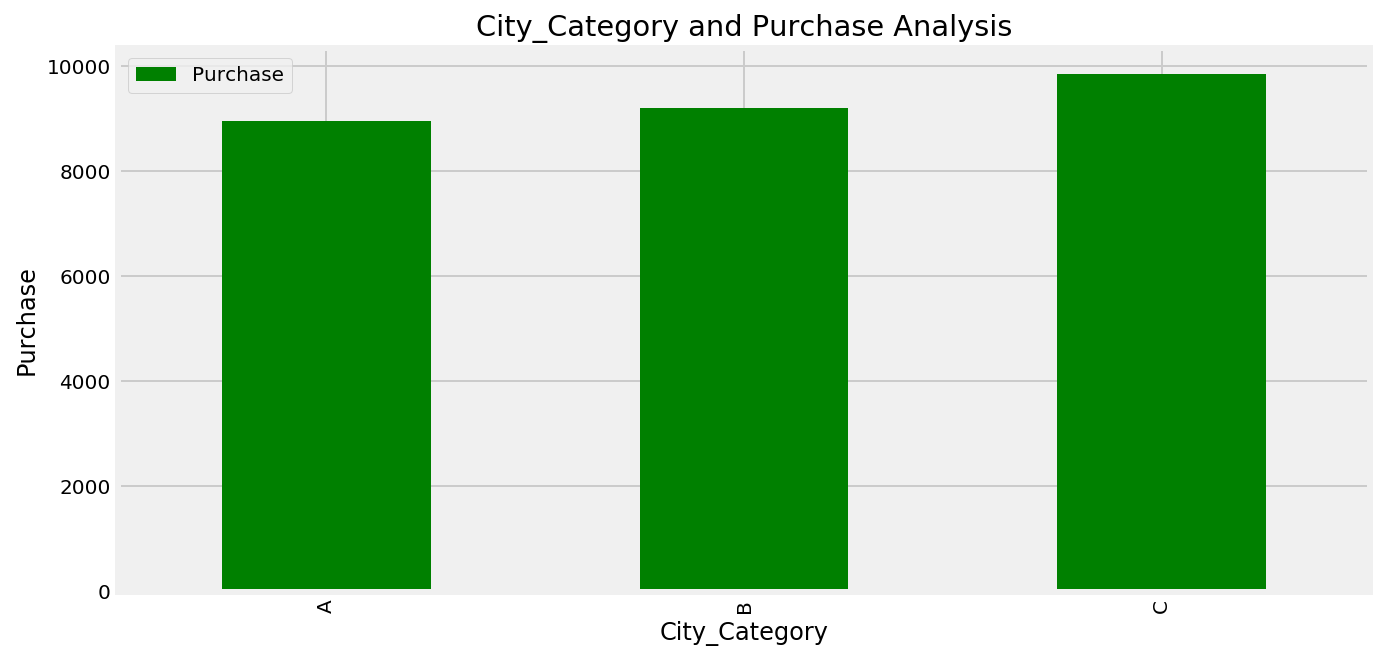

In [40]:
#city_category with Purchase analysis
city_c= df.pivot_table(index="City_Category", values="Purchase", aggfunc=np.mean)
city_c.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.show()
# on average customers who lived in city C spent the most 

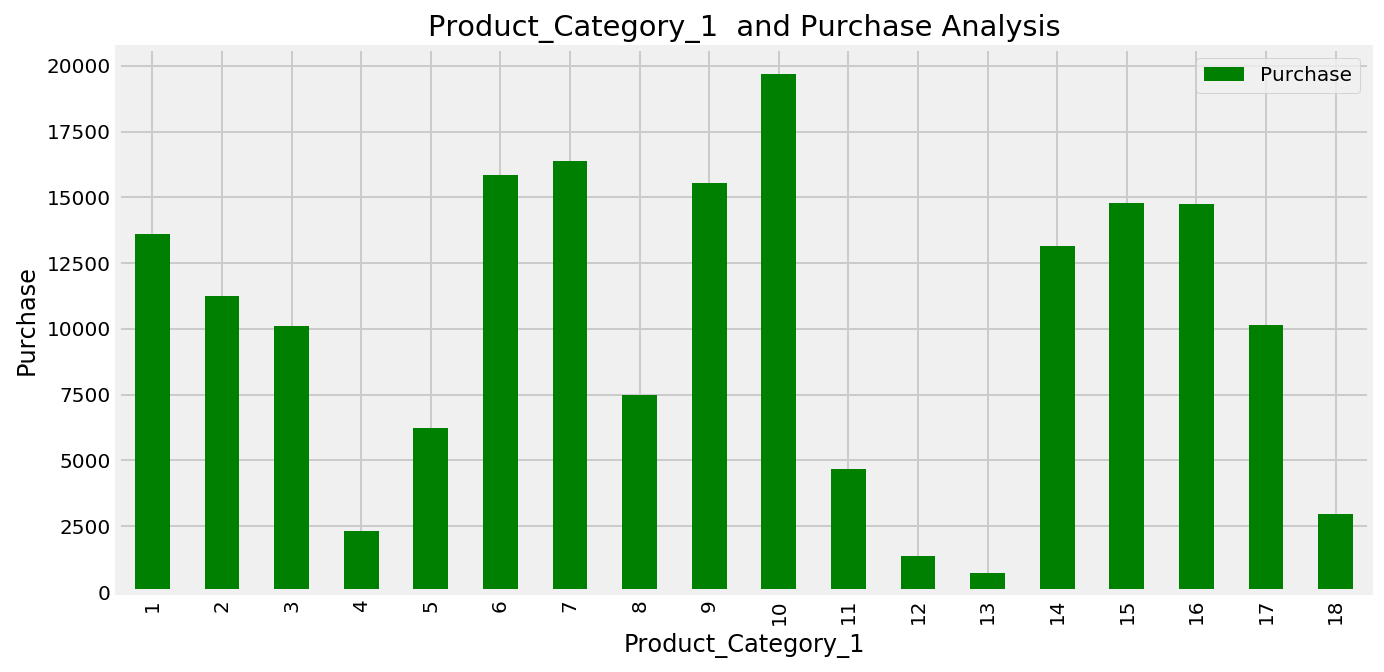

In [41]:
#product_category_1 with Purchase analysis
Pc_c= df.pivot_table(index="Product_Category_1", values="Purchase", aggfunc=np.mean)
Pc_c.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1  and Purchase Analysis")
plt.show()
# on average in product_Caterory_1 type 10 is most purchased  

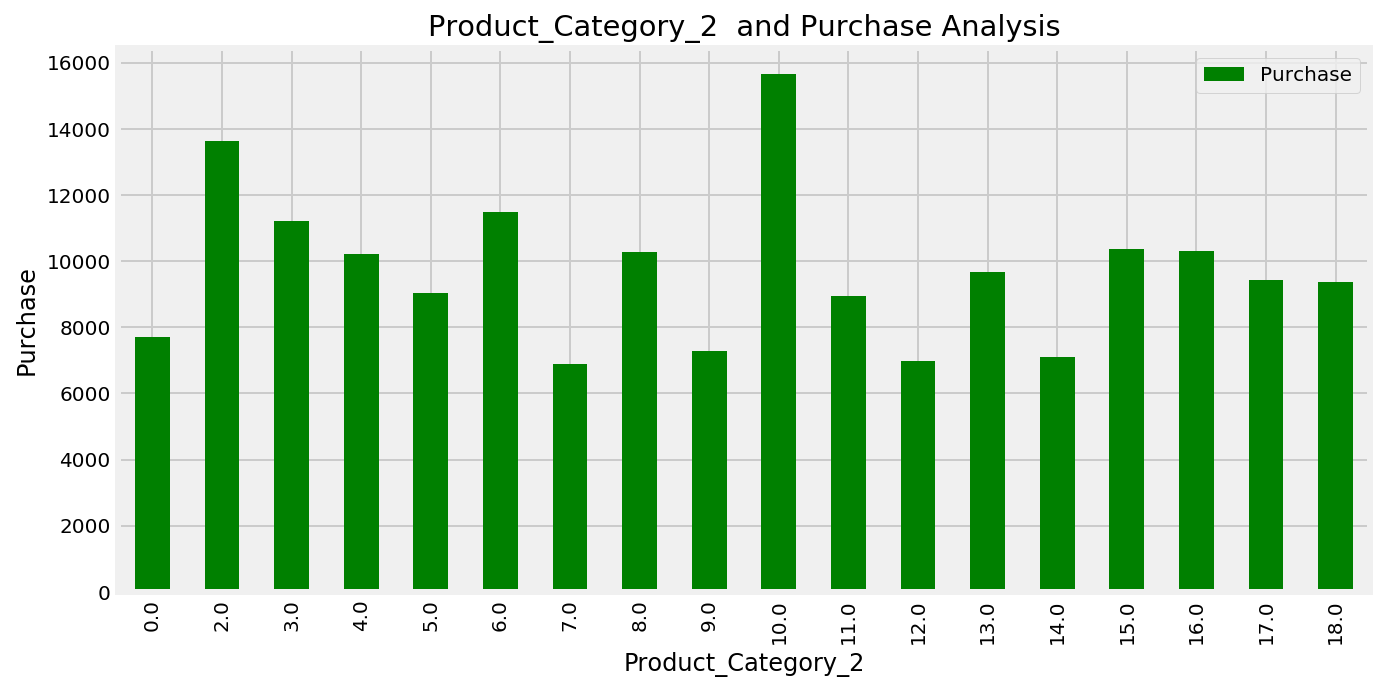

In [42]:
#product_category_2 with Purchase analysis
Pc_2= df.pivot_table(index="Product_Category_2", values="Purchase", aggfunc=np.mean)
Pc_2.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2  and Purchase Analysis")
plt.show()
# on average in product_Caterory_2 type 10 is most purchased  

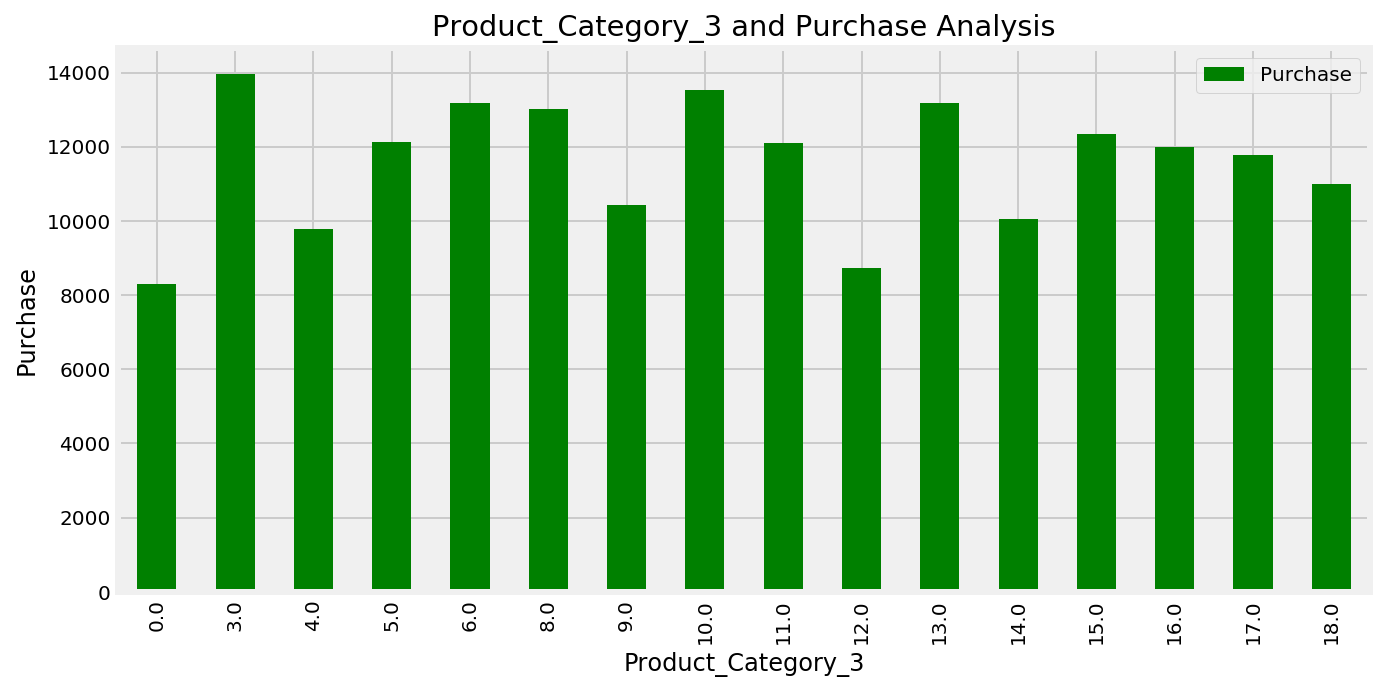

In [43]:
#product_category_3 with Purchase analysis
Pc_3= df.pivot_table(index="Product_Category_3", values="Purchase", aggfunc=np.mean)
Pc_3.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.show()
# on average in product_Caterory_3 type 3 is most purchased  

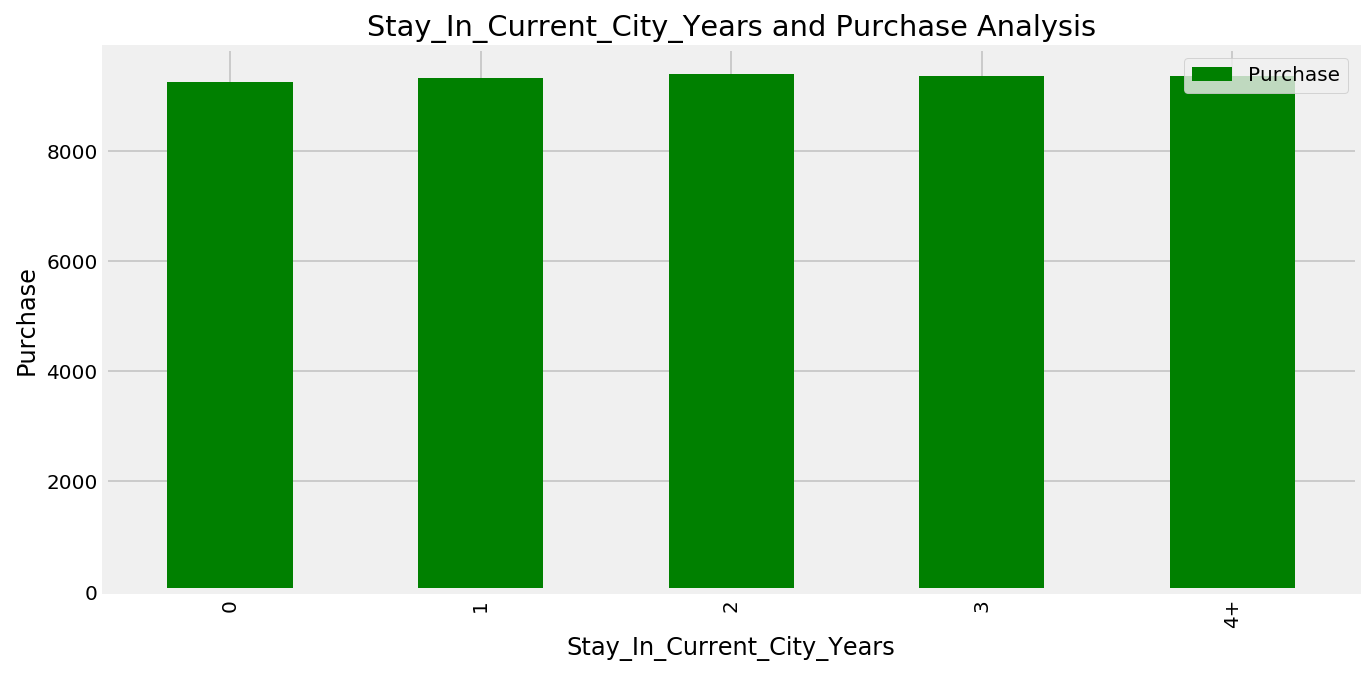

In [44]:
#stayin_current_city with Purchase analysis
Pc_3= df.pivot_table(index="Stay_In_Current_City_Years", values="Purchase", aggfunc=np.mean)
Pc_3.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()
# on average in Stay_In_Current_City_Years spent are the same in all groups

In [45]:
# Around half a million rows in this dataset
# Almost all columns represent categorical features
# Product Category 2 &3 had a lot of missing values, now represented as category 0
# It might be better to represent the Stay_In_Current_City_Years category numerically rather than categorically
# there is a risk of accuracy of future model, since the mean in every category of our features are slightly the same 

In [46]:
# next we will try to bulid model that expect customer purchase based on age, city_category and occupation  
# we might use logistic regression 